This code snippet configures TensorFlow to limit GPU memory usage when running on a GPU. Let's break down each part of the code:

TensorFlow will use at most 50% of the available GPU memory. Adjust this value based on your specific requirements

In [3]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session =InteractiveSession(config = config)

In [4]:
#convolutional Neural network 
# importing the libraries 
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [5]:
tf.__version__

'2.15.0'

In [6]:
#data preprocessing
#preprocessing the training set

train_datagen = ImageDataGenerator(rescale= 1./255,
                                  shear_range= 0.2,
                                  zoom_range= 0.2,
                                  horizontal_flip = True)

In [7]:
training_set = train_datagen.flow_from_directory("train",
                                                target_size= (64,64),
                                                batch_size=32,
                                                class_mode='binary')

Found 25000 images belonging to 2 classes.


In [8]:
#preprocessing the training set
test_datagen = ImageDataGenerator(rescale= 1./255)


In [9]:
test_set = test_datagen.flow_from_directory('test1',
                                            target_size= (64,64),
                                            batch_size=32,
                                            class_mode='binary')

Found 12500 images belonging to 1 classes.


In [10]:
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.regularizers import l2

In [11]:

import tensorflow as tf
from tensorflow.keras.layers import Dense

# Initializing the CNN
cnn = tf.keras.models.Sequential()

# Step 1: Convolution
cnn.add(tf.keras.layers.Conv2D(filters=32, padding="same", kernel_size=3, activation="relu", strides=2, input_shape=(64, 64, 3)))

# Step 2: Pooling
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Step 3: Flattening
cnn.add(tf.keras.layers.Flatten())

# Step 4: Full Connection
cnn.add(tf.keras.layers.Dense(units=128, activation="relu"))

# Step 5: Output Layer
#for binary classification
cnn.add(Dense(1, kernel_regularizer=tf.keras.regularizers.l2(0.01), activation="linear"))


In [12]:
#for multiclassification
import tensorflow as tf
from tensorflow.keras.layers import Dense

# Assuming 4 classes in your problem
num_classes = 4

# Initializing the CNN
cnn = tf.keras.models.Sequential()

# Step 1: Convolution
cnn.add(tf.keras.layers.Conv2D(filters=32, padding="same", kernel_size=3, activation="relu", strides=2, input_shape=(64, 64, 3)))

# Step 2: Pooling
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Step 3: Flattening
cnn.add(tf.keras.layers.Flatten())

# Step 4: Full Connection
cnn.add(tf.keras.layers.Dense(units=128, activation="relu"))

# Step 5: Output Layer
cnn.add(Dense(num_classes, kernel_regularizer=tf.keras.regularizers.l2(0.01), activation="softmax"))

# Compile the model
cnn.compile(optimizer="adam", loss="categorical_crossentropy", metrics=['accuracy'])

In [13]:
cnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 8192)              0         
                                                                 
 dense_2 (Dense)             (None, 128)               1048704   
                                                                 
 dense_3 (Dense)             (None, 4)                 516       
                                                                 
Total params: 1050116 (4.01 MB)
Trainable params: 1050116 (4.01 MB)
Non-trainable params: 0 (0.00 Byte)
________________

In [14]:
#part 3 - trsining the cnn
#compiling the cnn model
cnn.compile(optimizer="adam", loss="hinge", metrics=['accuracy'])
#tranning the cnn on the training set and evaluating it on the test set 
# Training the CNN
r=cnn.fit(training_set, epochs=15, validation_data=test_set)

Epoch 1/15


782/782 [==============================] - 164s 208ms/step - loss: 1.0063 - accuracy: 0.3932 - val_loss: 1.2500 - val_accuracy: 0.9422
Epoch 2/15
782/782 [==============================] - 83s 106ms/step - loss: 1.0000 - accuracy: 0.4265 - val_loss: 1.2500 - val_accuracy: 1.0000
Epoch 3/15
782/782 [==============================] - 79s 101ms/step - loss: 1.0000 - accuracy: 0.4185 - val_loss: 1.2500 - val_accuracy: 1.0000
Epoch 4/15
782/782 [==============================] - 84s 107ms/step - loss: 1.0000 - accuracy: 0.4055 - val_loss: 1.2500 - val_accuracy: 1.0000
Epoch 5/15
782/782 [==============================] - 95s 121ms/step - loss: 1.0000 - accuracy: 0.3848 - val_loss: 1.2500 - val_accuracy: 0.0340
Epoch 6/15
782/782 [==============================] - 92s 118ms/step - loss: 1.0000 - accuracy: 0.3680 - val_loss: 1.2500 - val_accuracy: 4.8000e-04
Epoch 7/15
782/782 [==============================] - 86s 110ms/step - loss: 1.0000 - accuracy: 0.3515 - val_loss: 1.2500 -

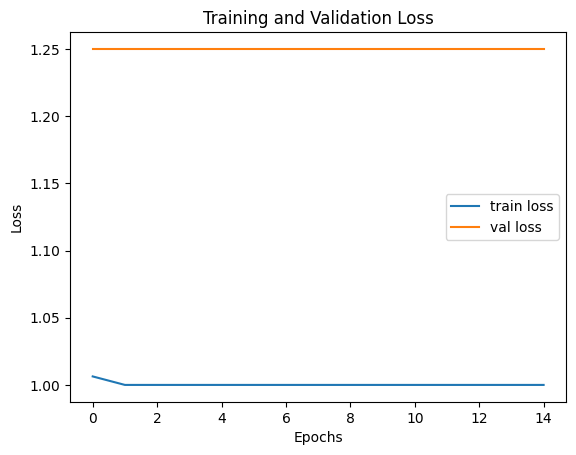

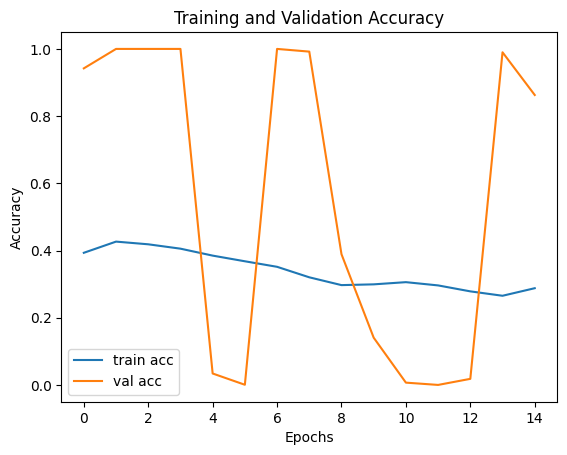

In [15]:

# Plot the loss
import matplotlib.pyplot as plt

plt.plot(r.history['loss'], label="train loss")
plt.plot(r.history["val_loss"], label="val loss")
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training and Validation Loss")
plt.savefig("lossVal_loss.png")
plt.show()

# Plot the accuracy
plt.plot(r.history['accuracy'], label="train acc")
plt.plot(r.history["val_accuracy"], label="val acc")
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training and Validation Accuracy")
plt.savefig("AccVal_acc.png")
plt.show()


In [16]:
#save it as a h5 file 
from tensorflow.keras.models import load_model
cnn.save("model_rcat_dog.h5")

C:\Users\tumom\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [17]:
from tensorflow.keras.models import load_model

#load model
model = load_model("model_rcat_dog.h5")

In [18]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 8192)              0         
                                                                 
 dense_2 (Dense)             (None, 128)               1048704   
                                                                 
 dense_3 (Dense)             (None, 4)                 516       
                                                                 
Total params: 1050116 (4.01 MB)
Trainable params: 1050116 (4.01 MB)
Non-trainable params: 0 (0.00 Byte)
________________

In [32]:
# Part 4 - Making a single prediction

import numpy as np
from tensorflow.keras.preprocessing import image
test_image = image.load_img("test1//test1//167.jpg", target_size = (64,64))
test_image = image.img_to_array(test_image)
test_image=test_image/255
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)

1/1 [==============================] - 0s 25ms/step


In [33]:
result

array([[0.25000158, 0.24999797, 0.25000238, 0.24999811]], dtype=float32)

In [40]:
if result[0][0]<0:
    result[0][0] = 0
    print(result[0][0])
    print("The image classified is cat")
elif result[0][0]>=0:
    result[0][0] = 1
    print(result[0][0])
    print("The image classified is dog")

1.0
The image classified is dog
